In [97]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np
from time import time
import pickle
#from datetime import *

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', 60)

# Matplotlib for visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 18

from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

import warnings
warnings.filterwarnings('ignore')

# Imputing missing values and scaling values
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

# Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR,SVC
from sklearn.neighbors import KNeighborsRegressor

# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV,train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score,mean_squared_error,mean_absolute_error,recall_score,max_error,roc_curve, accuracy_score,confusion_matrix,r2_score,f1_score,precision_score

In [91]:
import os.path
from os import path

smaple='20m'
data_file='allData_resample_'+smaple
#allData_resample_15m
pre_targets='location_no'#'floor_no'#

df=pd.read_csv('DB/new_data/'+data_file+'.csv')

# location_floor_map = {'ElevatorHall1F': 2, 'ElevatorHallB2F':0, 'ElevatorHall3F':4, 'CorridorB1F':1,
#  'Corridor1F':2, 'Corridor3F':4,'Corridor2F':3, 'ElevatorHall2F':3, 'CorridorB2F':0,
#  'ElevatorHallB1F':1}
# df['floor_no'] = df['location'].map(location_floor_map)
df

,location,new_tsp,temperature,humidity,pressure,light,weekday,quarter,month,hour,day,location_no,floor_no
0,Corridor1F,2019-07-07 15:40:00,24.000000,66.868421,1006.945919,17.400541,7,3,7,15,7,6,2
1,Corridor1F,2019-07-07 16:00:00,24.315789,65.078947,1007.157280,11.833834,7,3,7,16,7,6,2
2,Corridor1F,2019-07-07 16:20:00,24.888889,64.111111,1008.000752,0.486400,7,3,7,16,7,6,2
3,Corridor1F,2019-07-07 16:40:00,24.647059,63.823529,1007.578824,6.576210,7,3,7,16,7,6,2
4,Corridor1F,2019-07-07 17:00:00,24.650000,64.000000,1006.785398,14.770270,7,3,7,17,7,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67304,ElevatorHallB2F,2020-12-12 22:20:00,23.197467,33.110733,1008.196202,751.277457,6,4,12,22,12,1,0
67305,ElevatorHallB2F,2020-12-12 22:40:00,23.234640,32.984988,1008.232075,751.277457,6,4,12,22,12,1,0
67306,ElevatorHallB2F,2020-12-12 23:00:00,23.375154,32.693465,1008.280934,751.277457,6,4,12,23,12,1,0
67307,ElevatorHallB2F,2020-12-12 23:20:00,23.292311,32.927597,1008.315396,751.277457,6,4,12,23,12,1,0


In [94]:
# Save the no scores, training, and testing data
# no_location =pd.read_csv('DB/new_data/no_location.csv')

targets = df[pre_targets]
#features =df.drop(columns={'location','location_no','floor_no','light'})
features =df.drop(columns={'location','location_no','floor_no'})
# Split into 70% training and 30% testing set
train_features, test_features, train_labels, test_labels = train_test_split(features, targets, test_size = 0.3, random_state = 42)


model_type="sk"
resultfilename=model_type+'_'+data_file+'_'+pre_targets
print(resultfilename)
filepath='DB/result/'+resultfilename+'with_light.csv'
print(filepath)
if path.exists(filepath):
    print('yes')
    result_pd=pd.read_csv(filepath)
else: 
    print('file not extis')
    result_pd=pd.DataFrame()


# train_features=cudf.read_csv('DB/floor_data/training_features.csv')
# test_features=cudf.read_csv('DB/floor_data/testing_features.csv')
# train_labels=cudf.read_csv('DB/floor_data/training_labels.csv')
# test_labels=cudf.read_csv('DB/floor_data/testing_labels.csv')

# train_features=pd.read_csv('DB/new_data/training_features.csv')
# test_features=pd.read_csv('DB/new_data/testing_features.csv')
# train_labels=pd.read_csv('DB/new_data/training_labels.csv')
# test_labels=pd.read_csv('DB/new_data/testing_labels.csv')

# #no_location =pd.read_csv('DB/data_fill/no_location.csv')
# train_features=pd.read_csv('DB/data_fill/training_features.csv')
# test_features=pd.read_csv('DB/data_fill/testing_features.csv')
# train_labels=pd.read_csv('DB/data_fill/training_labels.csv')
# test_labels=pd.read_csv('DB/data_fill/testing_labels.csv')

# Display sizes of data
print('Training Feature Size: ', train_features.shape)
print('Testing Feature Size:  ', test_features.shape)
print('Training Labels Size:  ', train_labels.shape)
print('Testing Labels Size:   ', test_labels.shape)
print(np.unique(train_labels))
print(pd.value_counts(test_labels.values))

print(test_labels.isnull().sum())
result_pd['origin']=test_labels.values

print(train_features.columns.values)

sk_allData_resample_20m_location_no
DB/result/sk_allData_resample_20m_location_nowith_light.csv
file not extis
Training Feature Size:  (47116, 10)
Testing Feature Size:   (20193, 10)
Training Labels Size:   (47116,)
Testing Labels Size:    (20193,)
[ 1  2  3  4  5  6  7  8  9 10]
1     3112
9     3067
5     2510
10    2464
4     1999
7     1851
8     1796
6     1754
2     1250
3      390
dtype: int64
0
['new_tsp' 'temperature' 'humidity' 'pressure' 'light' 'weekday' 'quarter'
 'month' 'hour' 'day']


In [95]:
imputer = SimpleImputer(strategy='median')

# Train on the training features
imputer.fit(train_features.drop('new_tsp', axis=1))

# Transform both training data and testing data
X = imputer.transform(train_features.drop('new_tsp', axis=1))
X_test = imputer.transform(test_features.drop('new_tsp', axis=1))
print('Missing values in training features: ', np.sum(np.isnan(X)))
print('Missing values in testing features:  ', np.sum(np.isnan(X_test)))

Missing values in training features:  0
Missing values in testing features:   0


NameError: name 'GaussianNB' is not defined

In [98]:
# Create the scaler object with a range of 0-1
scaler = MinMaxScaler(feature_range=(0, 1))
# Fit on the training data
scaler.fit(X)
# Transform both the training and testing data
X = scaler.transform(X)
X_test = scaler.transform(X_test)

In [99]:
# Convert y to one-dimensional array (vector)
y = np.array(train_labels).reshape((-1, ))
y_test = np.array(test_labels).reshape((-1, ))

Linear Regression

Support Vector Machine Regression

Random Forest Regression

Gradient Boosting Regression

K-Nearest Neighbors Regression

In [100]:
# Function to calculate mean absolute error    
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

def mse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred)

def addToResult(result_pd,pred,model_name):
    #global re_pd
    #print(pred_re.type)
    #pred_re=pred_re.set_index(name=model_name)
    #print(pred_re.columns)
    #pred_re.columns=[model_name]
    pred=pd.DataFrame({model_name:pred})
    re_pd= pd.concat([result_pd,pred],axis=1,ignore_index=True)
    return re_pd

def pro_pred(y_pred):
    propre=np.round(y_pred)
    return propre

def make_confusion_matrix(y_test, model_pred):
    cf_m = confusion_matrix(y_test, model_pred)
    return cf_m

def fit_and_predict(model,filename):
    global y_test
    global X_test
    global X
    global y
    # Train the model
    model.fit(X, y)
    # Make predictions and evalute
    model_pred = model.predict(X_test)
    model_pred=pro_pred(model_pred)
    
    filename = 'stored_model/'+filename+'.sav'
    pickle.dump(model, open(filename, 'wb'))
    return model_pred

def fit_and_predict_pred(model,filename):
    global y_test
    global X_test
    global X
    global y
    model.fit(X, y)
    #y_score = model.fit(X, y,probability=True).decision_function(X_test)
    #print(y_score.shape)
    probabilities = model.predict_proba(X_test)
    model_pred = model.predict(X_test)
    model_pred=pro_pred(model_pred)
    print(probabilities)
    #y_score = svm.fit(X_train, y_train).decision_function(X_test)
    print(model_pred, y_test)
    print(train_labels.unique())
    fpr, tpr, thresholds = roc_curve(y_test, probabilities[:,1],pos_label=train_labels.unique())
    return fpr, tpr, thresholds 
    
def evaluate(y_test, model_pred):  
    #model_pred=pro_pred(model_pred)
    #model_mae = mean_absolute_error(y_test.astype(np.float32), model_pred.astype(np.float32))
    model_mae = mean_absolute_error(y_test, model_pred)
    model_mse = mean_squared_error(y_test, model_pred)
    model_r2_score= r2_score(y_test, model_pred)
    return model_mae, model_mse,model_r2_score


# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model,filename):
    # Train the model
    model.fit(X, y)
    # Make predictions and evalute
    model_pred = model.predict(X_test)
    model_pred=pro_pred(model_pred)
    #print("test value size...", pd.value_counts(y_test))
    #print("predicted value size...", pd.value_counts(model_pred))
    model_mae = mae(y_test, model_pred)
    model_mse = mse(y_test, model_pred)
    # Compute confusion matrix
    #print(cnf_matrix)
    model_r2_score= r2_score(y_test, model_pred)
    model_max_error= max_error(y_test, model_pred)
    print(model_pred)
    # save the model to disk
    filename = 'stored_model/'+filename+'.sav'
    pickle.dump(model, open(filename, 'wb'))
    return model_mae,model_mse,model_r2_score,model_max_error, model_pred 

In [101]:
#result_pd=addToResult(result_pd,test_labels,'origin')
result_pd

,origin
0,7
1,10
2,5
3,4
4,5
...,...
20188,1
20189,8
20190,10
20191,9


In [103]:
%%time
t0 = time()
adb = AdaBoostClassifier()

adb_pred= fit_and_predict(adb,'adb_sk')
#lr_mae,lr_mse,lr_r2_score=evaluate(y_test, lr_pred)
#fpr, tpr, thresholds =fit_and_predict_pred(adb,'adb_sk')
#lr_mae,lr_mse,lr_r2_score,lr_max_error,lr_pred = fit_and_evaluate(lr,'lr')
t1 = time()
adb_t=t1-t0

print(adb_pred.shape)
result_pd['adb']=adb_pred
#result_pd
# plt.plot(fpr, tpr)
# plt.show()

(20193,)
CPU times: user 2.48 s, sys: 0 ns, total: 2.48 s
Wall time: 2.47 s


In [107]:
gnb = GaussianNB()
#clf = DecisionTreeClassifier(random_state=0)
gnb_pred = fit_and_predict(gnb, 'gnb')
#y_pred = gnb.fit(X_train, y_train).predict(X_test)
acc=accuracy_score(y_test,gnb_pred)
print("Number of mislabeled points out of a total %d points : %d, accuracy: %0.2f"% (X_test.shape[0], (y_test != gnb_pred).sum(),acc))
print("Number of mislabeled points out of a total %d points : %d"% (X_test.shape[0], (y_test != gnb_pred).sum()))
result_pd['gnb']=gnb_pred
result_pd

Number of mislabeled points out of a total 20193 points : 15269, accuracy: 0.24
Number of mislabeled points out of a total 20193 points : 15269


,origin,adb,gnb
0,7,9,4
1,10,6,7
2,5,10,5
3,4,4,2
4,5,9,5
...,...,...,...
20188,1,2,2
20189,8,8,7
20190,10,6,6
20191,9,4,6


In [73]:
%%time
t0 = time()
clf = DecisionTreeClassifier(random_state=0)
clf_pred = fit_and_predict(clf, 'DTree')

t1 = time()
clf_t=t1-t0

result_pd['DTree']=clf_pred
print(result_pd['DTree'].unique())
result_pd

[ 7  8  5  4  1  6 10  9  2  3]
CPU times: user 248 ms, sys: 4 ms, total: 252 ms
Wall time: 249 ms


,origin,lr,gb_C,svr,xgbt,xgbtc,lgbm,rf,gbtR,knn,SVC,logRe,logRe_mulabel_pred,GridSearch_best,RandSearch_best,adb,DTree
0,7,6.0,6.0,5.0,9.0,9,9,8.0,6.0,7.0,4,4,4,7.0,7.0,4,7
1,10,6.0,6.0,7.0,7.0,8,7,8.0,7.0,7.0,7,7,7,8.0,9.0,7,8
2,5,5.0,5.0,6.0,1.0,5,9,6.0,7.0,5.0,1,1,1,7.0,5.0,1,5
3,4,6.0,6.0,4.0,4.0,4,4,4.0,3.0,3.0,4,4,4,4.0,4.0,4,4
4,5,6.0,6.0,5.0,5.0,5,5,7.0,7.0,7.0,4,4,4,7.0,7.0,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20188,1,6.0,6.0,5.0,4.0,1,1,1.0,5.0,2.0,1,8,8,2.0,1.0,1,1
20189,8,6.0,6.0,7.0,7.0,8,8,8.0,8.0,8.0,7,4,4,7.0,8.0,7,8
20190,10,6.0,6.0,7.0,9.0,9,9,9.0,7.0,8.0,9,10,10,8.0,9.0,6,9
20191,9,6.0,6.0,7.0,9.0,9,5,9.0,7.0,8.0,9,10,10,6.0,9.0,6,9


In [25]:
%%time
t0 = time()
lr = LinearRegression()

lr_pred= fit_and_predict(lr,'lr_sk')
lr_mae,lr_mse,lr_r2_score=evaluate(y_test, lr_pred)

#lr_mae,lr_mse,lr_r2_score,lr_max_error,lr_pred = fit_and_evaluate(lr,'lr')
t1 = time()
lr_t=t1-t0

print(lr_pred.shape)
result_pd['lr']=lr_pred
print(result_pd.shape)

(40366,)
(40366, 19)
CPU times: user 68 ms, sys: 60 ms, total: 128 ms
Wall time: 24.7 ms


In [87]:
%%time
t0 = time()
clf = GradientBoostingClassifier(n_estimators=10, 
                                 learning_rate=0.1, 
                                 max_depth=5)

gbc_pred= fit_and_predict(clf,'gbc')
#gbc_mae,gbc_mse,gbc_r2_score=evaluate(y_test, gbc_pred)

t1 = time()
gbc_t=t1-t0
result_pd['gbc']=gbc_pred
result_pd

CPU times: user 8.96 s, sys: 8 ms, total: 8.97 s
Wall time: 8.97 s


,origin,lr,gb_C,svr,xgbt,xgbtc,lgbm,rf,gbtR,knn,SVC,logRe,logRe_mulabel_pred,GridSearch_best,RandSearch_best,adb,DTree,gtbc_best,gtbc_grid_best,gbc
0,7,6.0,6.0,5.0,9.0,9,9,8.0,6.0,7.0,4,4,4,7.0,7.0,4,7,7,7,9
1,10,6.0,6.0,7.0,7.0,8,7,8.0,7.0,7.0,7,7,7,8.0,9.0,7,8,7,7,7
2,5,5.0,5.0,6.0,1.0,5,9,6.0,7.0,5.0,1,1,1,7.0,5.0,1,5,9,9,10
3,4,6.0,6.0,4.0,4.0,4,4,4.0,3.0,3.0,4,4,4,4.0,4.0,4,4,4,4,4
4,5,6.0,6.0,5.0,5.0,5,5,7.0,7.0,7.0,4,4,4,7.0,7.0,4,5,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20188,1,6.0,6.0,5.0,4.0,1,1,1.0,5.0,2.0,1,8,8,2.0,1.0,1,1,1,1,4
20189,8,6.0,6.0,7.0,7.0,8,8,8.0,8.0,8.0,7,4,4,7.0,8.0,7,8,7,8,7
20190,10,6.0,6.0,7.0,9.0,9,9,9.0,7.0,8.0,9,10,10,8.0,9.0,6,9,9,9,9
20191,9,6.0,6.0,7.0,9.0,9,5,9.0,7.0,8.0,9,10,10,6.0,9.0,6,9,9,9,9


In [88]:
result_pd

,origin,lr,gb_C,svr,xgbt,xgbtc,lgbm,rf,gbtR,knn,SVC,logRe,logRe_mulabel_pred,GridSearch_best,RandSearch_best,adb,DTree,gtbc_best,gtbc_grid_best,gbc
0,7,6.0,6.0,5.0,9.0,9,9,8.0,6.0,7.0,4,4,4,7.0,7.0,4,7,7,7,9
1,10,6.0,6.0,7.0,7.0,8,7,8.0,7.0,7.0,7,7,7,8.0,9.0,7,8,7,7,7
2,5,5.0,5.0,6.0,1.0,5,9,6.0,7.0,5.0,1,1,1,7.0,5.0,1,5,9,9,10
3,4,6.0,6.0,4.0,4.0,4,4,4.0,3.0,3.0,4,4,4,4.0,4.0,4,4,4,4,4
4,5,6.0,6.0,5.0,5.0,5,5,7.0,7.0,7.0,4,4,4,7.0,7.0,4,5,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20188,1,6.0,6.0,5.0,4.0,1,1,1.0,5.0,2.0,1,8,8,2.0,1.0,1,1,1,1,4
20189,8,6.0,6.0,7.0,7.0,8,8,8.0,8.0,8.0,7,4,4,7.0,8.0,7,8,7,8,7
20190,10,6.0,6.0,7.0,9.0,9,9,9.0,7.0,8.0,9,10,10,8.0,9.0,6,9,9,9,9
20191,9,6.0,6.0,7.0,9.0,9,5,9.0,7.0,8.0,9,10,10,6.0,9.0,6,9,9,9,9


In [ ]:
%%time
t0 = time()
#svm = SVR(C = 1000, gamma = 0.1)
svr = SVR(C = 1, gamma = 0.15,cache_size=500)
svr_pred= fit_and_predict(svr,'svr')
svr_mae,svr_mse,svr_r2_score=evaluate(y_test, svr_pred)

t1 = time()
svr_t=t1-t0
result_pd['svr']=svr_pred
result_pd

In [ ]:
import xgboost as xgb

#model.fit(X, y)
    # Make predictions and evalute
#model_pred = model.predict(X_test)

# read data into Xgboost DMatrix format
#train_labels=train_labels.copy()-1
#test_labels=test_labels.copy()-1
featurename=train_features.drop('new_tsp', axis=1).columns.values
print(featurename)
if pre_targets=='location_no':
    y=y-1
    y_test=y_test-1
    
dtrain = xgb.DMatrix(X, label=y,feature_names=featurename)
dtest = xgb.DMatrix(X_test, label=y_test,feature_names=featurename)
#dtrain = xgb.DMatrix(Xtrain, label=ytrain, feature_names=feature_names)

#feature_names=feature_names
# specify parameters via map
params = {
    'booster':'gbtree',     #  tree-based models
    'objective': 'multi:softmax', 
    'num_class':10, 
    'eta': 0.1,             # Same to learning rate
    'gamma':0,              # Similar to min_impurity_decrease in GBDT
    'alpha': 0,             # L1 regularization term on weight (analogous to Lasso regression)
    'lambda': 2,            # L2 regularization term on weights (analogous to Ridge regression)
    'max_depth': 5,         # Same as the max_depth of GBDT
    'subsample': 1,         # Same as the subsample of GBDT
    'colsample_bytree': 1,  # Similar to max_features in GBM
    'min_child_weight': 1,  # minimum sum of instance weight (Hessian) needed in a child
    'nthread':1,            # default to maximum number of threads available if not set
}
num_round = 10

# start training
#t0 = time()
bst = xgb.train(params, dtrain, num_round)
# get prediction and evaluate
xgb_pred = bst.predict(dtest)

t1 = time()
xgb_t=t1-t0
print(xgb_t)
if pre_targets=='location_no':
    result_pd['xgbt']=xgb_pred+1
result_pd

In [ ]:
from xgboost import XGBClassifier

xgbt_cmodel = XGBClassifier()
xgbt_cpred=fit_and_predict(xgbt_cmodel,'xgbtc')
result_pd['xgbtc']=xgbt_cpred
result_pd

In [ ]:
# feature importance
# print(xgbt_cmodel.feature_importances_)
# # plot
# plt.bar(range(1,len(xgbt_cmodel.feature_importances_)+1,1), xgbt_cmodel.feature_importances_)
# plt.show()
importance = pd.DataFrame(xgbt_cmodel.feature_importances_,index=featurename, columns=['importance'])
print(importance)

#xgb.plot_importance(xgbt_cmodel, max_num_features=10)

importance.sort_values("importance", ascending = True).plot( y ="importance", kind = 'barh', color = 'green', edgecolor = 'black')
plt.ylabel('');
plt.yticks(size = 14);
plt.xlabel("importance"); plt.xticks(size = 14)
plt.title('Model Comparison on importance', size = 16);

In [ ]:
#!conda install lightgbm --yes

In [ ]:
# print((train_labels-1).unique())
# print((test_labels-1).unique())

In [566]:
import lightgbm as lgb

print((train_labels-1).unique())
# train_data = lgb.Dataset(X, label=y-1,feature_name=featurename)
# test_data = lgb.Dataset(X_test, label=y_test-1)
featurename=train_features.drop('new_tsp', axis=1).columns.values
#print(X_test)

if pre_targets=='location_no':
    y=y-1
    y_test=y_test-1
    
train_data = lgb.Dataset(X, label=y)
test_data = lgb.Dataset(X_test, label=y_test)

# train_data = lgb.Dataset(train_features.drop('new_tsp', axis=1), label=y-1)
# test_data = lgb.Dataset(test_features.drop('new_tsp', axis=1), label=y_test-1)

# dtrain = xgb.DMatrix(train_features.drop('new_tsp', axis=1), label=train_labels-1,feature_names=featurename)
# dtest = xgb.DMatrix(test_features.drop('new_tsp', axis=1), label=test_labels-1)

#best_para=gs.best_params_
best_para={'colsample_bytree': 0.8754369812451743, 'min_child_samples': 372, 'min_child_weight': 10.0, 'num_leaves': 44, 'reg_alpha': 1, 'reg_lambda': 0, 'subsample': 0.568664015245299} 


# specify parameters via map
# params = {
#     'num_leaves':31,                # Same to max_leaf_nodes in GBDT, but GBDT's default value is None
#     'max_depth': -1,                # Same to max_depth of xgboost
#     'tree_learner': 'serial', 
#     'application':'multiclass',     # Same to objective of xgboost
#     'num_class':10,                 # Same to num_class of xgboost
#     'learning_rate': 0.1,           # Same to eta of xgboost
#     'min_split_gain': 0,            # Same to gamma of xgboost
#     'lambda_l1': 0,                 # Same to alpha of xgboost
#     'lambda_l2': 0,                 # Same to lambda of xgboost
#     'min_data_in_leaf': 20,         # Same to min_samples_leaf of GBDT
#     'bagging_fraction': 1.0,        # Same to subsample of xgboost
#     'bagging_freq': 0,
#     'bagging_seed': 0,
#     'feature_fraction': 1.0,         # Same to colsample_bytree of xgboost
#     'feature_fraction_seed': 2,
#     'min_sum_hessian_in_leaf': 1e-3, # Same to min_child_weight of xgboost
#     'num_threads': 1
# }
num_round = 10

t0 = time()

bst = lgb.train(params, train_data, num_round)

# get prediction and evaluate
#ypred_onehot = bst.predict(X_test)
ypred_onehot = bst.predict(X_test)

lgbm_pred = []
for i in range(len(ypred_onehot)):
    lgbm_pred.append(ypred_onehot[i].argmax())
    
t1 = time()
lgbm_t=t1-t0
#accuracy = np.sum(ypred == ytest) / len(ypred)
#print('Test accuracy = {}'.format(accuracy))
#print(lgbm_pred)
result_pd['lgbm']=lgbm_pred
if pre_targets=='location_no':
    result_pd['lgbm']=result_pd['lgbm']+1

[ 1  2 -1  3  0]
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007273 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 842
[LightGBM] [Info] Number of data points in the train set: 47116, number of used features: 8
[LightGBM] [Info] Start training from score -1.552430
[LightGBM] [Info] Start training from score -2.106025
[LightGBM] [Info] Start training from score -1.560583
[LightGBM] [Info] Start training from score -1.712311
[LightGBM] [Info] Start training from score -1.287048
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Info] Start training from score -34.538776


In [567]:
result_pd

,origin,lr,gb_C,svr,xgbt,xgbtc,lgbm,rf,gbtR,knn,SVC,logRe,logRe_mulabel_pred,GridSearch_best,RandSearch_best,adb,DTree
0,3,2.0,2.0,2.0,1.0,3,4,3.0,2.0,3.0,4,1,1,2.0,3.0,4,4
1,4,2.0,2.0,3.0,4.0,3,3,3.0,3.0,3.0,3,3,3,3.0,3.0,3,3
2,2,2.0,2.0,2.0,5.0,2,4,2.0,3.0,2.0,4,4,4,3.0,2.0,4,4
3,1,2.0,2.0,1.0,2.0,1,1,1.0,1.0,1.0,4,1,1,1.0,1.0,1,1
4,2,2.0,2.0,2.0,3.0,2,2,3.0,3.0,3.0,4,1,1,3.0,3.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20188,0,2.0,2.0,2.0,1.0,0,0,0.0,1.0,0.0,0,3,3,1.0,0.0,1,1
20189,3,2.0,2.0,3.0,4.0,3,3,3.0,3.0,3.0,3,3,3,3.0,3.0,1,1
20190,4,2.0,2.0,3.0,5.0,4,4,4.0,3.0,3.0,4,4,4,2.0,4.0,4,4
20191,4,2.0,2.0,3.0,3.0,4,2,4.0,3.0,3.0,4,4,4,3.0,4.0,4,4


In [560]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

n_HP_points_to_test=10

# fit_params={"early_stopping_rounds":30, 
#             #"eval_metric" : 'mae', 
#             "eval_set" : [(X_test,y_test)],
#             'eval_names': ['valid'],
#             #'objective' : 'multiclass',
#             'metrics' : {'val_f1'},
#             #'callbacks': [lgb.reset_parameter(learning_rate=learning_rate_010_decay_power_099)],
#             'verbose': 100,
#             'categorical_feature': 'auto'}

param_test ={'num_leaves': sp_randint(6, 20), 
             'min_child_samples': sp_randint(100, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

clf = lgb.LGBMClassifier(max_depth=-1, random_state=314, silent=True, metric='None', n_jobs=4, n_estimators=5000)
gs = RandomizedSearchCV(
    estimator=clf, param_distributions=param_test, 
    n_iter=n_HP_points_to_test,
    cv=3,
    refit=True,
    random_state=314,
    verbose=True)

gs.fit(X, y)
print('Best score reached: {} with params: {} '.format(gs.best_score_, gs.best_params_))

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 14.9min finished


Best score reached: 0.9162280711534058 with params: {'colsample_bytree': 0.8754369812451743, 'min_child_samples': 372, 'min_child_weight': 10.0, 'num_leaves': 44, 'reg_alpha': 1, 'reg_lambda': 0, 'subsample': 0.568664015245299} 


In [564]:
results = pd.DataFrame(gs.cv_results_)
# Plot the training and testing error vs number of trees
print(results.columns)
results

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_colsample_bytree', 'param_min_child_samples',
       'param_min_child_weight', 'param_num_leaves', 'param_reg_alpha',
       'param_reg_lambda', 'param_subsample', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_min_child_samples,param_min_child_weight,param_num_leaves,param_reg_alpha,param_reg_lambda,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,37.627120,0.193745,19.229886,0.118057,0.950124,301,0.1,28,0,100,0.932647,"{'colsample_bytree': 0.9501241488957805, 'min_...",0.910225,0.914995,0.912894,0.912705,0.001952,2
1,15.836639,0.415595,1.768390,0.130058,0.973167,171,1e-05,41,10,100,0.557573,"{'colsample_bytree': 0.9731668400523877, 'min_...",0.856170,0.856097,0.853040,0.855102,0.001458,7
2,10.135651,0.209104,0.002771,0.000042,0.775604,424,10000,30,0,100,0.934866,"{'colsample_bytree': 0.7756038066515227, 'min_...",0.276073,0.276090,0.276090,0.276085,0.000008,10
3,21.011510,0.089696,7.636462,0.036750,0.819604,422,1000,28,2,5,0.664986,"{'colsample_bytree': 0.8196039247657971, 'min_...",0.645549,0.651449,0.645654,0.647551,0.002757,9
4,11.055953,0.074242,0.427650,0.066786,0.806323,491,0.1,24,100,20,0.656442,"{'colsample_bytree': 0.8063232376017694, 'min_...",0.650070,0.651130,0.648965,0.650055,0.000884,8
5,20.525365,0.072561,10.413088,0.012762,0.687909,163,10,10,1,0.1,0.677506,"{'colsample_bytree': 0.6879091728281055, 'min_...",0.905450,0.908437,0.907227,0.907038,0.001227,4
6,24.676679,1.076466,9.296018,0.407787,0.875437,372,10,44,1,0,0.568664,"{'colsample_bytree': 0.8754369812451743, 'min_...",0.914428,0.916714,0.917542,0.916228,0.001317,1
7,27.324565,0.129707,16.254645,0.051637,0.404829,350,0.001,36,1,5,0.927402,"{'colsample_bytree': 0.404828563763895, 'min_c...",0.899083,0.902006,0.903088,0.901392,0.001692,6
8,23.520430,0.565263,12.623569,0.030124,0.727199,212,0.01,13,0.1,5,0.447821,"{'colsample_bytree': 0.7271985991098294, 'min_...",0.912263,0.912703,0.913149,0.912705,0.000362,3
9,18.739559,1.397795,9.463101,0.074575,0.556075,103,10,22,2,1,0.893911,"{'colsample_bytree': 0.55607546409401, 'min_ch...",0.900484,0.903789,0.904935,0.903069,0.001887,5


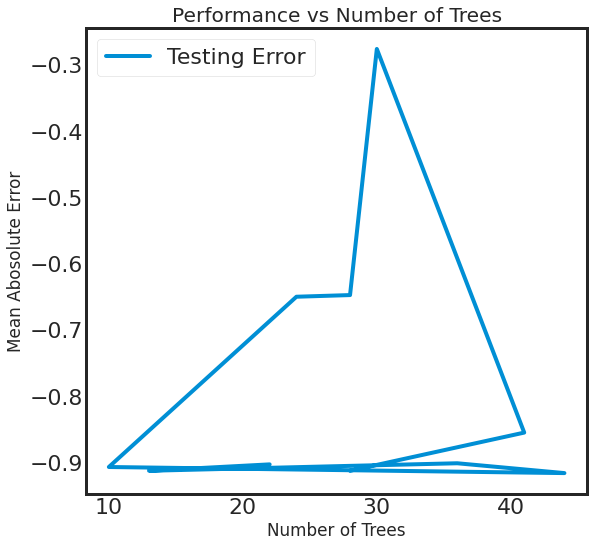

In [565]:
figsize(8, 8)
sns.set_style(style='white')
#plt.style.use('fivethirtyeight')
plt.plot(results['param_num_leaves'], -1 * results['mean_test_score'], label = 'Testing Error')
#plt.plot(results['param_n_estimators'], -1 * results['mean_train_score'], label = 'Training Error')
plt.xlabel('Number of Trees'); plt.ylabel('Mean Abosolute Error'); plt.legend();
plt.title('Performance vs Number of Trees');

In [ ]:
ypred_onehot = bst.predict(X_test)

lgbm_pred = []
for i in range(len(ypred_onehot)):
    lgbm_pred.append(ypred_onehot[i].argmax())

In [ ]:
result_pd

In [15]:
print(filepath)
result_pd.to_csv(filepath, index = False)

DB/result/sk_allData_resample_5m_location_no.csv


In [ ]:
#lgb.feature_importance()

importance = pd.DataFrame(bst.feature_importance(),index=featurename, columns=['importance'])
importance

In [ ]:
# for col,score in zip(train_features.columns,lgb.feature_importance):
#     print(col,score)

#lgb.plot_importance(bst)

import matplotlib.pyplot as plt
%matplotlib inline

importance.sort_values("importance", ascending = True).plot( y ="importance", kind = 'barh', color = 'green', edgecolor = 'black')
plt.ylabel('');
plt.yticks(size = 14);
plt.xlabel("importance"); plt.xticks(size = 14)
plt.title('Model Comparison on importance', size = 16);

In [ ]:
%%time

t0 = time()
rf_sk = RandomForestRegressor(random_state=60)
rf_pred= fit_and_predict(rf_sk ,'rf_sk')
random_forest_mae,rf_mse,rf_r2_score=evaluate(y_test, rf_pred)

t1 = time()
rf_t=t1-t0

result_pd['rf']=rf_pred
result_pd

In [ ]:
#%%timeit -n 1 -r 1
t0 = time()
gradient_boosted = GradientBoostingRegressor(random_state=60)
gb_pred= fit_and_predict(gradient_boosted,'gb_sk')
gradient_boosted_mae, gb_mse,gb_r2_score=evaluate(y_test, gb_pred)
t1 = time()
gb_t=t1-t0

result_pd['gbtR']=gb_pred
result_pd

In [ ]:
#%%timeit -n 1 -r 1
t0 = time()
knn = KNeighborsRegressor(n_neighbors=10)
knn_pred = fit_and_predict(knn,'knn')

knn_mae,knn_mse,knn_r2_score,=evaluate(y_test, knn_pred)

t1 = time()
knn_t=t1-t0

result_pd['knn']=knn_pred
result_pd

In [ ]:
%%time
t0 = time()
#svm = SVR(C = 1000, gamma = 0.1)当C趋近于很小的时：意味着可以有更大的错误容忍
svc = SVC(kernel='rbf', C = 0.1, gamma = 0.15)
svc_pred= fit_and_predict(svc,'svc_sk')
svc_mae,svc_mse,svc_r2_score=evaluate(y_test, svc_pred)
#svc_mae,svc_mse,svc_r2_score,svc_max_error,svc_pred= fit_and_evaluate(svc,'svm')
t1 = time()
svc_t=t1-t0
result_pd['SVC']=svc_pred

In [ ]:
from sklearn.linear_model import LogisticRegression

t0 = time()
logRe = LogisticRegression(random_state=0)
#logRe_pred, logRe_mae,logRe_mse,logRe_r2_score= fit_and_evaluate(logRe_cuml,'logRe_cmul_full')
logRe_pred= fit_and_predict(logRe,'logRe_sk')
logRe_mae,logRe_mse,logRe_r2_score=evaluate(y_test, logRe_pred)

t1 = time()
logRe_t=t1-t0

result_pd['logRe']=logRe_pred

In [ ]:
from sklearn.linear_model import LogisticRegression

labels=np.unique(y_test)
labels.sort()

testing_probs = pd.DataFrame(columns=labels)  

models = {}

for origin in labels:
    model = LogisticRegression(random_state=0)
    y_new = y == origin
    model.fit(X, y_new)
    testing_probs[origin] = model.predict_proba(X_test)[:,1]
    
#testing_probs

logRe_mulabel_pred =testing_probs.astype(float).idxmax(axis=1)

result_pd['logRe_mulabel_pred']=logRe_mulabel_pred.values

In [65]:
result_pd

,origin,adb,DTree,xgbtc,lgbm,rf,knn,RandSearch_best,gb_C,gtbc_best,gtbc_grid_best,gbc
0,5,9,5,5,5,5.0,4.0,5.0,5,5,5,5
1,9,9,9,9,9,9.0,8.0,9.0,9,9,9,9
2,1,1,1,1,1,1.0,0.0,1.0,1,1,1,1
3,10,10,10,10,10,10.0,9.0,10.0,10,10,10,10
4,10,10,10,10,10,10.0,9.0,10.0,10,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...
377203,4,4,4,4,4,4.0,3.0,4.0,4,4,4,4
377204,1,1,1,1,1,1.0,0.0,1.0,1,1,1,1
377205,4,4,4,4,4,4.0,3.0,4.0,4,4,4,4
377206,1,1,1,1,1,1.0,0.0,1.0,1,1,1,1


In [89]:
#result_pd.to_csv('DB/result/sk_result_small_nolight.csv', index = False)
print(filepath)
result_pd.to_csv(filepath, index = False)

DB/result/sk_allData_resample_20m_location_no.csv


In [ ]:
#without process lr MAE = 1.5687 svm MAE = 1.2624 random forest MAE = 0.4122 GB MAE = 0.9731  KNN MAE = 0.7794
#without process lr MAE = 1.5356  svm MAE = 1.2192 random forest MAE = 0.3905 GB MAE =  0.9134  KNN MAE = 0.7670

time= np.array([logRe_t, lr_t,svr_t,svc_t,rf_t, gb_t, knn_t,gbc_t,lgbm_t,xgb_t])
timeT= pd.DataFrame({'model': ['LogiR','Linear Regression',
                               'SVR','SVC', 'Random Forest', 'Gradient Boosted_Random',
                               'K-Nearest Neighbors','Gradient Boosted Classifier',
                               'lightbgm','xgboost'],
                     'time':time})

In [ ]:
timeTfilepath = 'DB/result/ExecT_'+resultfilename+'.csv'
timeT.to_csv(timeTfilepath, index = False)

In [74]:
# Loss function to be optimized
#loss = ['lad', 'huber']

loss = ['deviance', 'exponential']
# Number of trees used in the boosting process
n_estimators = [10,20,50,80,100, 500, 900, 1100, 1500]

# Maximum depth of each tree
max_depth = [2, 3, 5, 10]

# Minimum number of samples per leaf
min_samples_leaf = [2, 4, 6, 8]

# Minimum number of samples to split a node
min_samples_split = [2, 4, 6, 10]

# Maximum number of features to consider for making splits
max_features = ['auto', 'sqrt', 'log2', None]

# Define the grid of hyperparameters to search
hyperparameter_grid = {'loss': loss,
                       'n_estimators': n_estimators,
                       'max_depth': max_depth,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}

In [75]:
# Create the model to use for hyperparameter tuning
#model = GradientBoostingRegressor(random_state = 42)
model=GradientBoostingClassifier(random_state = 42)
# Set up the random search with 4-fold cross validation

random_cv = RandomizedSearchCV(estimator=model,
                               param_distributions=hyperparameter_grid,
                               cv=4, n_iter=5, 
                               scoring = 'neg_mean_absolute_error',
                               n_jobs = -1, verbose = 1, 
                               return_train_score = True,
                               random_state=42)
random_cv.fit(X, y)

Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  20 | elapsed:  1.9min remaining:   38.9s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  6.9min finished


RandomizedSearchCV(cv=4, estimator=GradientBoostingClassifier(random_state=42),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'loss': ['deviance', 'exponential'],
                                        'max_depth': [2, 3, 5, 10],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [2, 4, 6, 8],
                                        'min_samples_split': [2, 4, 6, 10],
                                        'n_estimators': [10, 20, 50, 80, 100,
                                                         500, 900, 1100,
                                                         1500]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=1)

In [76]:
gb_rand=random_cv.best_estimator_

In [32]:
import pickle
if smaple!='1m':
    filename='stored_model/rand_gtbc_best_1m.sav'
    print("read saved model")
    gb_rand= pickle.load(open(filename, 'rb'))

read saved model


In [37]:
X_test.shape

(80603, 8)

In [77]:
gtbc_best = np.round(gb_rand.predict(X_test))

In [78]:
result_pd['gtbc_best']=gtbc_best

In [79]:
filename='rand_gtbc_best_'+smaple
filename = 'stored_model/'+filename+'.sav'
pickle.dump(gb_rand, open(filename, 'wb'))

In [85]:
result_pd.to_csv(filepath, index = False)

In [81]:
# Grid Search Object using the trees range and the random forest model
model=GradientBoostingClassifier(random_state = 42)
trees_grid = {'n_estimators': [100, 200, 300, 500, 1000,1500]}
grid_search = GridSearchCV(estimator = model, param_grid=trees_grid, cv = 4, 
                           scoring = 'neg_mean_absolute_error', verbose = 1,
                           n_jobs = -1, return_train_score = True)
grid_search.fit(X, y)

Fitting 4 folds for each of 6 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  24 | elapsed:  1.6min remaining: 17.2min
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed: 14.6min finished


GridSearchCV(cv=4, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'n_estimators': [100, 200, 300, 500, 1000, 1500]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [82]:
grid_search_model=grid_search.best_estimator_
gtbc_grid_best = np.round(grid_search_model.predict(X_test))
result_pd['gtbc_grid_best']=gtbc_grid_best

In [83]:
filename='grid_gtbc_best_'+smaple
filename = 'stored_model/'+filename+'.sav'
pickle.dump(grid_search_model, open(filename, 'wb'))

In [84]:
# Get all of the cv results and sort by the test performance
random_results = pd.DataFrame(random_cv.cv_results_).sort_values('mean_test_score', ascending = False)
random_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_loss,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,113.071277,0.067072,0.681613,0.003074,500,10,8,sqrt,3,deviance,"{'n_estimators': 500, 'min_samples_split': 10,...",-0.833517,-0.845658,-0.847695,-0.822141,-0.837253,0.010271,1,-0.681269,-0.676939,-0.666723,-0.671081,-0.674003,0.005544
3,407.827327,0.352814,0.897263,0.004245,1100,10,2,None,2,deviance,"{'n_estimators': 1100, 'min_samples_split': 10...",-0.935563,-0.932847,-0.941761,-0.925206,-0.933844,0.005942,2,-0.788182,-0.777429,-0.761355,-0.770977,-0.774486,0.009759
1,0.009088,0.000810,0.000000,0.000000,20,10,2,log2,5,exponential,"{'n_estimators': 20, 'min_samples_split': 10, ...",NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN
2,0.007475,0.001395,0.000000,0.000000,500,10,4,sqrt,3,exponential,"{'n_estimators': 500, 'min_samples_split': 10,...",NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
4,0.006949,0.001023,0.000000,0.000000,1100,10,6,log2,10,exponential,"{'n_estimators': 1100, 'min_samples_split': 10...",NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# # Get the results into a dataframe
# results = pd.DataFrame(random_cv.cv_results_)
# # Plot the training and testing error vs number of trees
# figsize(8, 8)
# sns.set_style(style='white')
# #plt.style.use('fivethirtyeight')
# plt.plot(results['param_n_estimators'], -1 * results['mean_test_score'], label = 'Testing Error')
# plt.plot(results['param_n_estimators'], -1 * results['mean_train_score'], label = 'Training Error')
# plt.xlabel('Number of Trees'); plt.ylabel('Mean Abosolute Error'); plt.legend();
# plt.title('Performance vs Number of Trees');

In [ ]:
#finalrand_model=random_cv.best_estimator_
finalrand_model=GradientBoostingRegressor(loss='huber', max_depth=15, max_features='log2',
                         min_samples_leaf=6, min_samples_split=10,
                         n_estimators=1500, random_state=42)
#GradientBoostingRegressor(loss='huber', max_depth=15, max_features='log2',
#                         min_samples_leaf=6, min_samples_split=10,
#                         n_estimators=1500, random_state=42)

In [ ]:
finalrand_model=GradientBoostingRegressor(loss='huber', max_depth=15, max_features='log2',
                         min_samples_leaf=6, min_samples_split=10,
                         n_estimators=1500, random_state=42)

In [ ]:
# Create a range of trees to evaluate
trees_grid = {'n_estimators': [10,20,50,70,100, 150, 200, 250, 300, 350, 400, 450, 500,
                               550, 600, 650, 700, 750, 800,1000,1100,1200,1500]}

model = GradientBoostingRegressor(loss = 'lad', max_depth = 5,
                                  min_samples_leaf = 6,
                                  min_samples_split = 6,
                                  max_features = None,
                                  random_state = 42)

# Grid Search Object using the trees range and the random forest model
grid_search = GridSearchCV(estimator = model, param_grid=trees_grid, cv = 4, 
                           scoring = 'neg_mean_absolute_error', verbose = 1,
                           n_jobs = -1, return_train_score = True)

In [ ]:
# Fit the grid search
grid_search.fit(X, y)

In [ ]:
# Get the results into a dataframe
sns.set_style(style='white')

results = pd.DataFrame(grid_search.cv_results_)
# Plot the training and testing error vs number of trees
figsize(8, 8)

plt.plot(results['param_n_estimators'], -1 * results['mean_test_score'], label = 'Testing Error')
plt.plot(results['param_n_estimators'], -1 * results['mean_train_score'], label = 'Training Error')
plt.xlabel('Number of Trees'); plt.ylabel('Mean Abosolute Error'); plt.legend();
plt.title('Performance vs Number of Trees');

plt.savefig('./images/cf/randomgbt.png',dpi=500)

In [ ]:
results.sort_values('mean_test_score', ascending = False).head(5)

In [ ]:
# Default model
default_model = GradientBoostingRegressor(random_state = 42)

# Select the best model
#final_model = grid_search.best_estimator_

final_model = GradientBoostingRegressor(loss='lad', max_depth=5, min_samples_leaf=6,
                         min_samples_split=6, n_estimators=1500,
                          random_state=42)

In [ ]:
finalrand_model=GradientBoostingRegressor(loss='huber', max_depth=15, max_features='log2',
                         min_samples_leaf=6, min_samples_split=10,
                         n_estimators=1500, random_state=42)

In [ ]:
%%time
#https://ipython.readthedocs.io/en/stable/interactive/magics.html
default_model.fit(X, y)

In [ ]:
%%time
finalrand_model.fit(X, y)

In [ ]:
final_RandSearch_pred = np.round(finalrand_model.predict(X_test))
result_pd['RandSearch_best']=final_RandSearch_pred

In [ ]:
%%time
final_model.fit(X, y)

In [ ]:
default_pred = np.round(default_model.predict(X_test))
final_GridSearch_pred = np.round(final_model.predict(X_test))
final_RandSearch_pred = np.round(finalrand_model.predict(X_test))


result_pd['GridSearch_best']=final_GridSearch_pred
result_pd['RandSearch_best']=final_RandSearch_pred

print('Default model performance on the test set: MAE = %0.4f.' % mae(y_test, default_pred))
print('Final Best Gridsearch model performance on the test set:   MAE = %0.4f.' % mae(y_test, final_GridSearch_pred))
print('Final Best Random Search model performance on the test set:   MAE = %0.4f.' % mae(y_test, final_RandSearch_pred))

In [ ]:
#filepath
print(len(final_RandSearch_pred))

In [ ]:
result_pd['origin'].unique()

In [33]:
result_pd

,origin,lr,gb_C,svr,xgbt,xgbtc,lgbm,rf,gbtR,knn,SVC,logRe,logRe_mulabel_pred,GridSearch_best,RandSearch_best,adb,DTree,gbc,gtbc_best,gtbc_grid_best
0,6,7.0,7.0,7.0,7.0,7,7,6.0,8.0,5.0,7,7,7,7.0,6.0,9,6,7,9,5
1,10,6.0,6.0,6.0,10.0,10,10,9.0,11.0,9.0,1,10,10,9.0,10.0,10,9,10,10,10
2,5,7.0,7.0,7.0,8.0,5,9,6.0,7.0,8.0,9,9,9,7.0,5.0,9,5,9,5,5
3,5,6.0,6.0,4.0,4.0,5,4,5.0,6.0,4.0,4,4,4,4.0,5.0,4,3,4,5,5
4,1,6.0,6.0,5.0,1.0,1,1,1.0,3.0,2.0,1,5,5,1.0,1.0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40361,8,6.0,6.0,7.0,8.0,8,8,8.0,8.0,8.0,4,4,4,8.0,8.0,4,8,8,8,8
40362,2,6.0,6.0,5.0,9.0,2,9,2.0,7.0,3.0,4,4,4,8.0,2.0,4,2,9,9,2
40363,9,5.0,5.0,5.0,10.0,9,9,9.0,8.0,10.0,1,5,5,8.0,9.0,2,9,5,9,9
40364,6,5.0,5.0,5.0,6.0,6,6,6.0,7.0,6.0,1,4,4,6.0,6.0,6,6,6,6,6


In [34]:
result_pd.to_csv(filepath, index = False)

In [ ]:
figsize(8, 8)

# Density plot of the final predictions and the test values
# sns.kdeplot(final_GridSearch_pred, label = 'Grid Search Prediction Values')
# sns.kdeplot(final_RandSearch_pred, label = 'Random Search Prediction Values')
# sns.kdeplot(y_test, label = 'Test Values')

model_comparison = pd.DataFrame({'Grid Search Prediction Values': final_GridSearch_pred,
                                 'Random Search Prediction Values': final_RandSearch_pred, 
                                       'Test Value':y_test})

sns.histplot(model_comparison, binwidth=1,alpha=0.5)

# sns.histplot(final_GridSearch_pred, label = 'Grid Search Prediction Values')
# sns.histplot(final_RandSearch_pred, label = 'Random Search Prediction Values')
# sns.histplot(y_test, label = 'Test Values')

    
#plt.legend(bbox_to_anchor=(1, 0), loc='lower right', borderaxespad=1, fontsize=18)
# Label the plot
plt.xlabel('Location_No'); 
plt.ylabel('Density');
plt.title('Test Values and Predictions');

In [ ]:
figsize = (6, 6)

# Calculate the errors
gridSearch_err = np.abs(final_GridSearch_pred - y_test)
randSearch_err = np.abs(final_RandSearch_pred - y_test)

model_comparison = pd.DataFrame({'Grid Search Prediction Errors': gridSearch_err,
                                 'Random Search Prediction Errors': randSearch_err})

# Plot the errors in a histogram
sns.histplot(model_comparison, binwidth=1,alpha=0.5)

# plt.hist(gridSearch_err, color = 'green', bins = 20,
#          edgecolor = 'black',label = 'GridSearch result')

# plt.hist(randSearch_err, color = 'blue', bins = 20,
#          edgecolor = 'black',label = 'Random Search result')

plt.legend(bbox_to_anchor=(1, 0), loc='lower right', borderaxespad=1, fontsize=18)


plt.xlabel('Error values'); 
plt.ylabel('Count')
plt.title('Error Distribution');
#plt.title('Distribution of Residuals');
plt.savefig('./images/boostingbest'+pre_targets+'.png',quality=100,dpi=500)

In [ ]:
print(np.where(~np.isfinite(X)))
print(np.where(~np.isfinite(X_test)))